# Homework 2: Linear Models for Regression and Classification

Due 10/21 at 11:59pm

In this notebook, we will be implementing three linear models: linear regression, logistic regression, and SVM. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

**Note: There are two notebooks in Homework 2. Please also complete the other notebook `HW2_Decision_Trees.ipynb` for full credit on this assignment.**

![comic](https://pbs.twimg.com/media/ESlslPWWkAAcNP-?format=jpg&name=900x900)

In [455]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import LinearSVC

## Part 1: Linear Regression

### 1.1 Data Exploration

In part 1, we will use two datasets to train and evaluate our linear regression model. 

The first dataset will be a synthetic dataset sampled from the following equations:

$$
\epsilon \sim \text{Normal}(0, 3) \\
y = 3x + 10 + \epsilon
$$

In [456]:
np.random.seed(0)
epsilon = np.random.normal(0, 3, 100)   # Sample epsilon from a Normal distribution
x = np.linspace(0, 10, 100)             # Sample x evenly between 0 and 100
y = 3 * x + 10 + epsilon

Note that the above dataset satisfies all the assumptions of a linear regression model:
- Linearity: $y$ is a linear (technically affine) function of $x$.
- Independence: the $x$'s are independently drawn, and not dependent on each other.
- Homoscedasticity: the $\epsilon$'s, and thus the $y$'s, have constant variance.
- Normality: the $\epsilon$'s are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**Plot y vs x in the synthetic dataset as a scatter plot. Label your axes and make sure your y-axis starts from 0.**

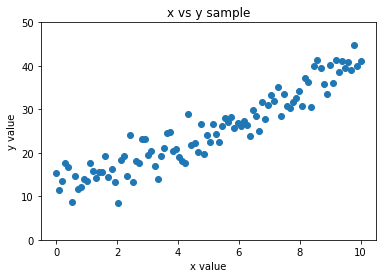

In [458]:
fig = plt.figure()
plt.scatter(x,y)
ax = plt.gca()
ax.set_ylim([0,50])
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('x vs y sample')
plt.show()



The second dataset we will be using is an [auto MPG dataset](https://archive.ics.uci.edu/ml/datasets/Auto+MPG). This dataset contains various characteristics for around 400 cars. We will use linear regression to predict the mpg label from seven features (4 continuous, 3 discrete).

In [459]:
# Load auto MPG dataset
auto_mpg_df = pd.read_csv('auto-mpg.csv')

# drop some rows with missing entries
auto_mpg_df = auto_mpg_df[auto_mpg_df['horsepower'] != '?']
# Cast horsepower column to float
auto_mpg_df['horsepower'] = auto_mpg_df['horsepower'].astype(float)

auto_mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [460]:
# Split data into features and labels
auto_mpg_X = auto_mpg_df.drop(columns=['mpg'])
auto_mpg_y = auto_mpg_df['mpg']

**Plot the distribution of the label (mpg) using a histogram.**

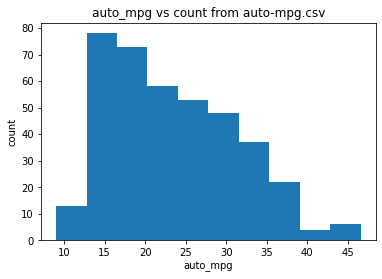

In [461]:
fig = plt.figure()
plt.hist(auto_mpg_y)
plt.xlabel('auto_mpg')
plt.ylabel('count')
plt.title('auto_mpg vs count from auto-mpg.csv')
plt.show()



**Plot the relationships between the label (mpg) and the continuous features (displacement, horsepower, weight, acceleration) using a small multiple of scatter plots. Make sure to label the axes.**

<ipython-input-462-e1113b56e900>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


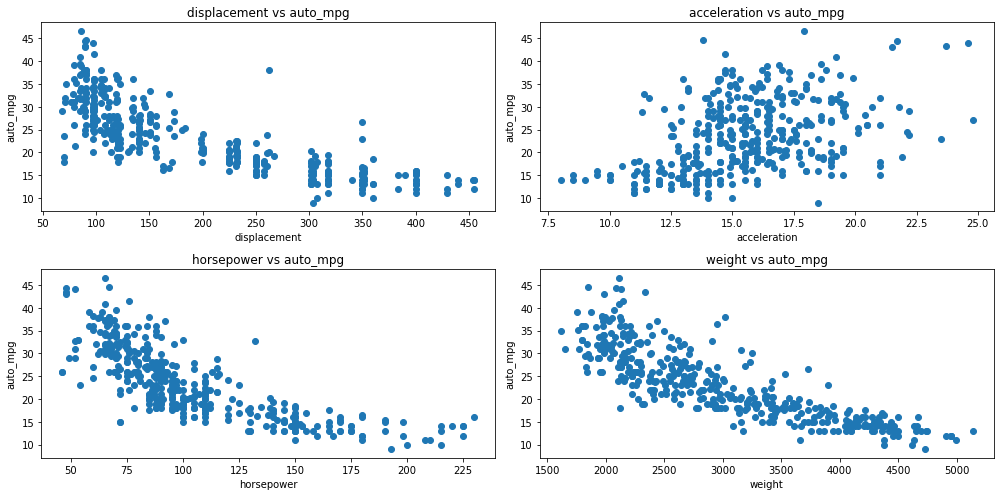

In [462]:
fig, ax = plt.subplots(2,2, figsize=(14,7))
ax[0][0].scatter(auto_mpg_X['displacement'], auto_mpg_y)
ax[0][0].set_xlabel('displacement')
ax[0][0].set_ylabel('auto_mpg')
ax[0][0].set_title('displacement vs auto_mpg')
ax[1][0].scatter(auto_mpg_X['horsepower'], auto_mpg_y)
ax[1][0].set_ylabel('auto_mpg')
ax[1][0].set_xlabel('horsepower')
ax[1][0].set_title('horsepower vs auto_mpg')
ax[1][1].scatter(auto_mpg_X['weight'], auto_mpg_y)
ax[1][1].set_ylabel('auto_mpg')
ax[1][1].set_xlabel('weight')
ax[1][1].set_title('weight vs auto_mpg')
ax[0][1].scatter(auto_mpg_X['acceleration'], auto_mpg_y)
ax[0][1].set_ylabel('auto_mpg')
ax[0][1].set_xlabel('acceleration')
ax[0][1].set_title('acceleration vs auto_mpg')
fig.tight_layout() 
fig.show()


**Plot the relationships between the label (mpg) and the discrete features (cylinders, model year, origin) using a small multiple of box plots. Make sure to label the axes.**

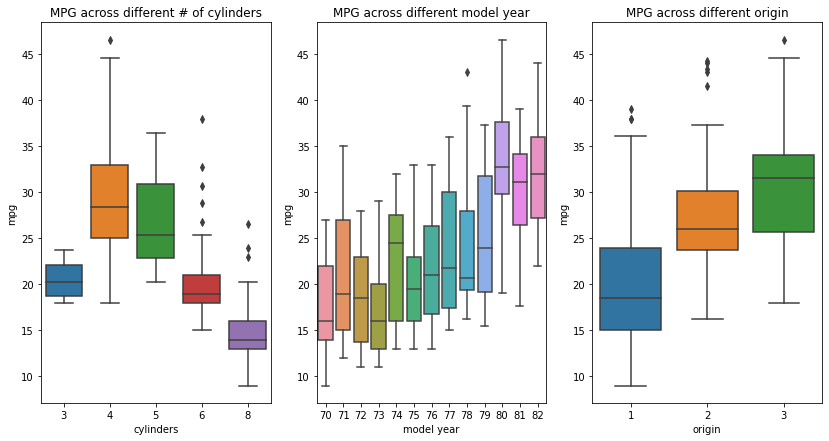

In [463]:
import seaborn as sns
fig, ax = plt.subplots(1,3, figsize=(14,7))
sns.boxplot(x=auto_mpg_X['cylinders'],y=auto_mpg_y, ax=ax[0])
ax[0].set_title("MPG across different # of cylinders")
sns.boxplot(x=auto_mpg_X['model year'],y=auto_mpg_y, ax=ax[1])
ax[1].set_title("MPG across different model year")
sns.boxplot(x=auto_mpg_X['origin'],y=auto_mpg_y, ax=ax[2])
ax[2].set_title("MPG across different origin")
plt.show()

**From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not?**

In [464]:
### Your answer here
'''
From the above, it appears many variables do have a linear relationship and are correlated to MPG, so
using linear regression could allow us to uncover the relationship between the variables and the target.
Further, we can look at the assumptions of the linear model
Linearity:  𝑦  is a linear (technically affine) function of  𝑥 .
Independence: the  𝑥 s are independently drawn, and not dependent on each other.
Homoscedasticity: the  𝜖 s, and thus the  𝑦 s, have constant variance.
Normality: the  𝜖 s are drawn from a Normal distribution (i.e. Normally-distributed errors)
We have not examined the indepence of the x, but we can say from the above visuals that each feature seems 
roughly normally distributed without massive outliers and satisfy the other conditions
'''


'\nFrom the above, it appears many variables do have a linear relationship and are correlated to MPG, so\nusing linear regression could allow us to uncover the relationship between the variables and the target.\nFurther, we can look at the assumptions of the linear model\nLinearity:  𝑦  is a linear (technically affine) function of  𝑥 .\nIndependence: the  𝑥 s are independently drawn, and not dependent on each other.\nHomoscedasticity: the  𝜖 s, and thus the  𝑦 s, have constant variance.\nNormality: the  𝜖 s are drawn from a Normal distribution (i.e. Normally-distributed errors)\nWe have not examined the indepence of the x, but we can say from the above visuals that each feature seems \nroughly normally distributed without massive outliers and satisfy the other conditions\n'

### 1.2 Data Pre-processing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:
1. Encode categorial features appropriately.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
4. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

The processing steps on the synthetic dataset have been provided for you below as a reference:

In [465]:
X = x.reshape((100, 1))   # Turn the x vector into a feature matrix X

# 1. No categorical features in the synthetic dataset (skip this step)

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

# 3. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

# 4. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train[:5], '\n\n', y_train[:5])

[[ 1.          0.53651502]
 [ 1.         -1.00836082]
 [ 1.         -0.72094206]
 [ 1.         -0.25388657]
 [ 1.          0.64429705]] 

 [25.10940496 14.74320191 20.52842695 21.80437679 31.0649271 ]


In [466]:
# Verify that columns (other than the ones column) have 0 mean, 1 variance
print(X_train.mean(axis=0), X_train.std(axis=0))
print(X_val.mean(axis=0), X_val.std(axis=0))
print(X_test.mean(axis=0), X_test.std(axis=0))

[ 1.00000000e+00 -4.81096644e-17] [0. 1.]
[ 1.        -0.1263445] [0.         1.03471221]
[ 1.         -0.15508637] [0.         1.13264481]


**Now, apply the same processing steps on the auto MPG dataset.**

In [467]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.compose import make_column_transformer

num_features = ['displacement', 'horsepower', 'weight', 'acceleration']
cat_features = ['cylinders', 'model year', 'origin']
all_features = cat_features + num_features + ['Bias']
auto_mpg_X['Bias'] = 1
auto_mpg_X_dev, auto_mpg_X_test, auto_mpg_y_dev, auto_mpg_y_test = train_test_split(auto_mpg_X, auto_mpg_y, test_size=0.2, random_state=0)
auto_mpg_X_train, auto_mpg_X_val, auto_mpg_y_train, auto_mpg_y_val = train_test_split(auto_mpg_X_dev, auto_mpg_y_dev, test_size=0.25, random_state=0)

column_transformer = make_column_transformer((StandardScaler(), num_features),
                                           (TargetEncoder(), cat_features),
                                            remainder='passthrough')

auto_mpg_X_train = column_transformer.fit_transform(auto_mpg_X_train,auto_mpg_y_train)
auto_mpg_X_val = column_transformer.transform(auto_mpg_X_val)
auto_mpg_X_test = column_transformer.transform(auto_mpg_X_test)

print(auto_mpg_X_train.mean(axis=0), auto_mpg_X_train.std(axis=0))
print(auto_mpg_X_val.mean(axis=0), auto_mpg_X_val.std(axis=0))
print(auto_mpg_X_test.mean(axis=0), auto_mpg_X_test.std(axis=0))

[-1.13869028e-16 -4.55476113e-17 -3.79563427e-17 -3.75767793e-16
  5.37606838e+00  7.61025641e+01  1.64102564e+00  1.00000000e+00] [1.         1.         1.         1.         1.64200469 3.650043
 0.82650059 0.        ]
[ 0.27104735  0.32570572  0.19416708 -0.22266949  5.65822785 75.97468354
  1.41772152  1.        ] [1.14229547 1.20793657 1.04860281 0.99264291 1.79933937 3.66638747
 0.73961322 0.        ]
[ 0.15011633  0.14644307  0.08099538 -0.09029904  5.56962025 75.62025316
  1.5443038   1.        ] [1.11421337 1.14404897 1.06582643 0.95550901 1.76235993 3.75281767
 0.77618783 0.        ]


At the end of this pre-processing, you should have the following vectors and matrices: 
- Syntheic dataset: X_train, X_val, X_test, y_train, y_val, y_test
- Auto MPG dataset: auto_mpg_X_train, auto_mpg_X_val, auto_mpg_X_test, auto_mpg_y_train, auto_mpg_y_val, auto_mpg_y_test

### 1.3 Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**Implement a `LinearRegression` class with two methods: `train` and `predict`.** You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.

In [468]:
from numpy.linalg import inv

class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        #nxmmn nxn 
        num_rows, num_cols = X.shape

        LHS = inv(np.matmul(X.T,X) + self.alpha*np.identity(num_cols))
        RHS = np.matmul(X.T,y)
        w = np.matmul(LHS,RHS)
        self.w = w
        ### Your code here
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        #print(X.shape)
        #print(self.w.shape)
        ### Your code here
        y_pred = np.matmul(X, self.w)
        return y_pred
        
        

### 1.4 Train,  Evaluate, and Interpret Linear Regression Model

**Using your `LinearRegression` implementation above, train a vanilla linear regression model ($\alpha = 0$) on (X_train, y_train) from the synthetic dataset. Use this trained model to predict on X_test. Report the first 5 predictions on X_test, along with the actual labels in y_test.**

In [469]:
vanilla_syn_model = LinearRegression(alpha=0)
vanilla_syn_model.train(X_train,y_train)
vanilla_predictions_test = vanilla_syn_model.predict(X_test)
print('predictions for first 5 values from test set: ')
print(vanilla_predictions_test[:5])
print('actual first 5 values from test set: ')
print(vanilla_predictions_test[:5])


predictions for first 5 values from test set: 
[18.04431976 35.63981279 11.00612254 26.54880806 32.4139724 ]
actual first 5 values from test set: 
[18.04431976 35.63981279 11.00612254 26.54880806 32.4139724 ]


**Plot a scatter plot of y_test vs X_test (just the non-ones column). Then, using the weights from the trained model above, plot the best-fit line for this data on the same figure.** If your line goes through the data points, you have likely implemented the linear regression correctly!

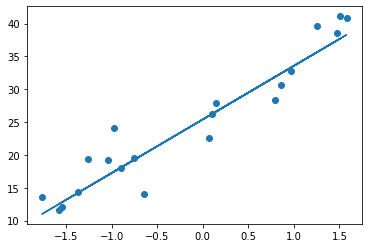

In [470]:
### Your code here
import matplotlib.pyplot as plt

plt.scatter(X_test[:,1], y_test)
plt.plot(X_test[:,1], np.matmul(X_test,vanilla_syn_model.w))
plt.show()


**Train a linear regression model ($\alpha = 0$) on the auto MPG training data. Make predictions and report the mean-squared error (MSE) on the training, validation, and test sets. Report the first 5 predictions on the test set, along with the actual labels.**

In [471]:
vanilla_syn_model_mpg = LinearRegression(alpha=0)
vanilla_syn_model_mpg.train(auto_mpg_X_train,auto_mpg_y_train)
vanilla_predictions_test_mpg = vanilla_syn_model_mpg.predict(auto_mpg_X_test)
print('predictions for first 5 values from test set: ')
print(vanilla_predictions_test_mpg[:5])
print('actual first 5 values from test set: ')
print(auto_mpg_y_test[:5].tolist())

train_est = vanilla_syn_model_mpg.predict(auto_mpg_X_train)
print('MSE using predicted from model on train set: ')
print(mean_squared_error(auto_mpg_y_train, train_est))

val_est = vanilla_syn_model_mpg.predict(auto_mpg_X_val)
print('MSE using predicted from model on val set: ')
print(mean_squared_error(auto_mpg_y_val, val_est))

test_est = vanilla_syn_model_mpg.predict(auto_mpg_X_test)
print('MSE using predicted from model on test set: ')
print(mean_squared_error(auto_mpg_y_test, test_est))



predictions for first 5 values from test set: 
[26.3546854  25.49133646 10.15877236 32.67356771 33.33190491]
actual first 5 values from test set: 
[28.0, 22.3, 12.0, 38.0, 33.8]
MSE using predicted from model on train set: 
10.670584193330885
MSE using predicted from model on val set: 
12.944798748882933
MSE using predicted from model on test set: 
10.881879497885077


**As a baseline model, use the mean of the training labels (auto_mpg_y_train) as the prediction for all instances. Report the mean-squared error (MSE) on the training, validation, and test sets using this baseline.** This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression MSEs should be much lower than these baseline MSEs.

In [472]:
### Your code here
from sklearn.metrics import mean_squared_error
baseline_est = auto_mpg_y_train.mean()
baseline_train_est = np.full((len(auto_mpg_y_train),1), baseline_est)
print('MSE using baseline on train set: ')
print(mean_squared_error(auto_mpg_y_train, baseline_train_est))
baseline_val_est = np.full((len(auto_mpg_y_val),1), baseline_est)
print('MSE using baseline on val set: ')
print(mean_squared_error(auto_mpg_y_val, baseline_val_est))
baseline_test_est = np.full((len(auto_mpg_y_test),1), baseline_est)
print('MSE using baseline on test set: ')
print(mean_squared_error(auto_mpg_y_test, baseline_test_est))



MSE using baseline on train set: 
60.56461465410184
MSE using baseline on val set: 
60.47988929483246
MSE using baseline on test set: 
62.46160518794076


**Interpret your model trained on the auto MPG dataset using a bar chart of the model weights.** Make sure to label the bars (x-axis) and don't forget the bias term! Use lecture 3, slide 15 as a reference.

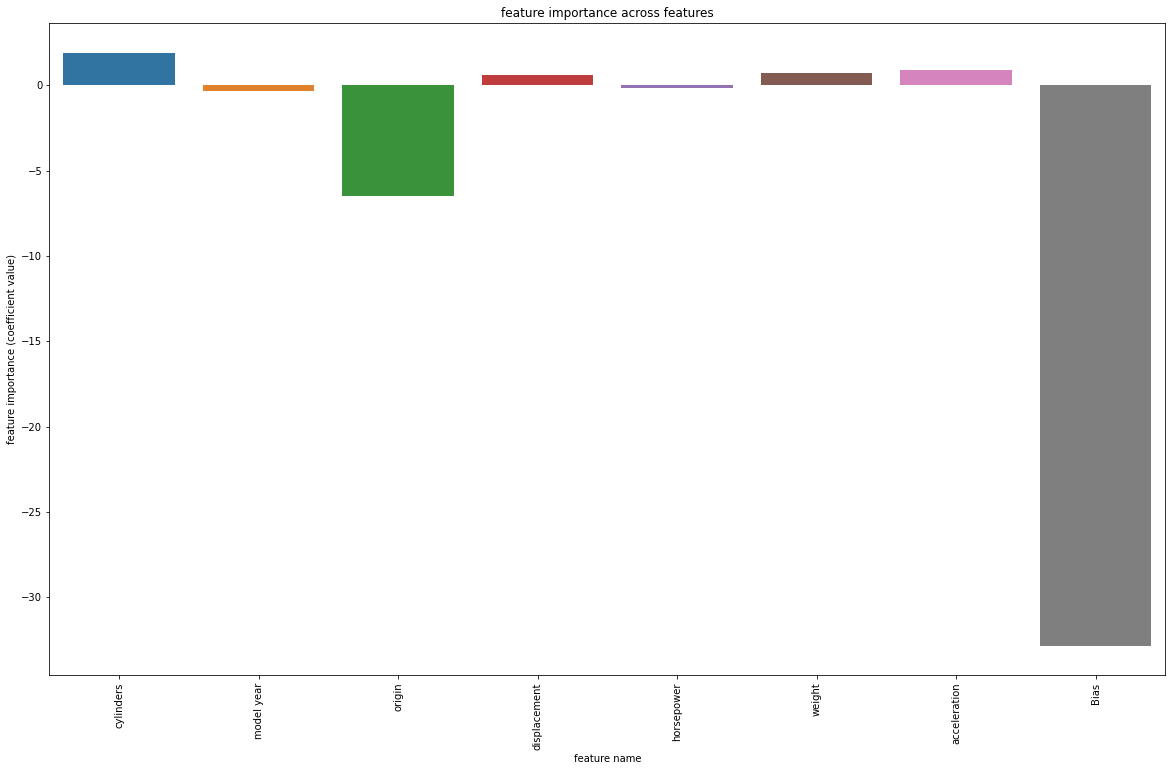

In [473]:

fig = plt.figure(figsize = (20,12))
xval = np.zeros((31))
yval = np.reshape(vanilla_syn_model_mpg.w, -1)
ax = sns.barplot(x=all_features, y=yval)
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('feature name')
ax.set_ylabel('feature importance (coefficient value)')
ax.set_title('feature importance across features')
plt.show()


**According to your model, which features are the greatest contributors to the MPG?**

In [474]:
### Your answer here

'''
Other than bias (which is same for all and so doesnt really help for unseen points),
the largest contributers are origin and #of cylinders.
'''

'\nOther than bias (which is same for all and so doesnt really help for unseen points),\nthe largest contributers are origin and #of cylinders.\n'

### 1.5 Tune Regularization Parameter $\alpha$

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the auto MPG dataset.

**Sweep out values for $\alpha$ using `alphas = np.logspace(-2, 1, 10)`. Perform a grid search over these $\alpha$ values, recording the training and validation MSEs for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation MSEs as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation MSE curves. Use a log scale for the x-axis.**

[]

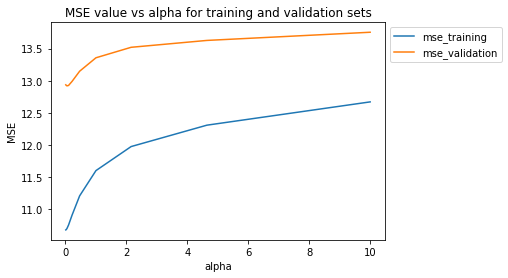

In [475]:
### Your code here
alphas = np.logspace(-2, 1, 10)
df_mses = pd.DataFrame(columns=['alpha', 'mse_training', 'mse_validation'])
for alpha in alphas: 
    model_lin = LinearRegression(alpha=alpha)
    model_lin.train(auto_mpg_X_train,auto_mpg_y_train)
    train_est = model_lin.predict(auto_mpg_X_train)
    train_mse = mean_squared_error(auto_mpg_y_train, train_est)
    
    val_est = model_lin.predict(auto_mpg_X_val)
    val_mse = mean_squared_error(auto_mpg_y_val, val_est)
    temp_df = pd.DataFrame(columns=['alpha', 'mse_training', 'mse_validation'], data=[[alpha, train_mse, val_mse]])
    df_mses = df_mses.append(temp_df)

df_mses.head()
ax = df_mses.set_index('alpha').plot()
ax.legend(bbox_to_anchor=(1.0,1.0))
ax.set_ylabel('MSE')
ax.set_title('MSE value vs alpha for training and validation sets')
ax.plot()

**Explain your plot above. How do training and validation MSE behave with decreasing model complexity (increasing $\alpha$)?**

In [476]:
### Your answer here

'''
MSE increases for both training and validation as alpha increases. This makes sense as we keep the model simpler, in general
the MSE will be higher. As alpha increases further, eventually MSE for training and validation will be about the same
since the model will be effectively guessing. You can start to see that in the above graph as MSE validation starts 
higher but increases at a slower rate
'''

'\nMSE increases for both training and validation as alpha increases. This makes sense as we keep the model simpler, in general\nthe MSE will be higher. As alpha increases further, eventually MSE for training and validation will be about the same\nsince the model will be effectively guessing. You can start to see that in the above graph as MSE validation starts \nhigher but increases at a slower rate\n'

**Using the $\alpha$ which gave the best validation MSE above, train a model on the training set. Report the value of $\alpha$ and its training, validation, and test MSE.** This is the final tuned model which you would deploy in production.

In [477]:
### Your code here
print(df_mses)

#Alpha with best validation score is 
#       alpha  mse_training  mse_validation
#0   0.046416     10.691693       12.918939

prod_model = LinearRegression(alpha=.046416)
prod_model.train(auto_mpg_X_train, auto_mpg_y_train)
train_est = prod_model.predict(auto_mpg_X_train)
print('MSE using predicted from model on train set: ')
print(mean_squared_error(auto_mpg_y_train, train_est))

val_est = prod_model.predict(auto_mpg_X_val)
print('MSE using predicted from model on val set: ')
print(mean_squared_error(auto_mpg_y_val, val_est))

test_est = prod_model.predict(auto_mpg_X_test)
print('MSE using predicted from model on test set: ')
print(mean_squared_error(auto_mpg_y_test, test_est))

       alpha  mse_training  mse_validation
0   0.010000     10.671759       12.935579
0   0.021544     10.675722       12.927720
0   0.046416     10.691693       12.918939
0   0.100000     10.747656       12.925191
0   0.215443     10.901983       12.988506
0   0.464159     11.202840       13.147331
0   1.000000     11.597068       13.357086
0   2.154435     11.972111       13.520504
0   4.641589     12.305702       13.627680
0  10.000000     12.668902       13.755341
MSE using predicted from model on train set: 
10.691693098457268
MSE using predicted from model on val set: 
12.918938565491844
MSE using predicted from model on test set: 
10.951060791309319


## Part 2: Logistic Regression

### 2.1 Data Exploration

<img src="https://pathology.jhu.edu/build/assets/breast/_image1200/368/ILC.jpg" alt="cells" width="400"/>

In parts 2 and 3, we will be using a [breast cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) for classification. Given 30 continuous features describing the nuclei of cells in a digitized image of a [fine needle aspirate (FNA)](https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/fine-needle-aspiration-biopsy-of-the-breast.html) of a breast mass, we will train logistic regression and SVM models to classify each sample as benign (B) or malignant (M).

In [478]:
cancer_df = pd.read_csv('breast-cancer.csv')
cancer_df = cancer_df.drop(columns=['id', 'Unnamed: 32'])
#print(len(cancer_df.columns))

In [479]:
# Split data into features and labels
cancer_X = cancer_df.drop(columns=['diagnosis'])
cancer_y = cancer_df['diagnosis']
print(len(cancer_X.columns))

30


**Compute the distribution of the labels. What is the probability of observing the majority class?** This is a common baseline for accuracy in classification problems.

In [480]:
m_count = len(cancer_df[cancer_df['diagnosis'] == 'M'])
b_count = len(cancer_df[cancer_df['diagnosis'] == 'B'])
print(b_count / (m_count + b_count))
#62.7% Bengign

0.6274165202108963


**Plot the relationships between the label (diagnosis) and the 30 features using a small multiple of box plots. Make sure to label the axes.**

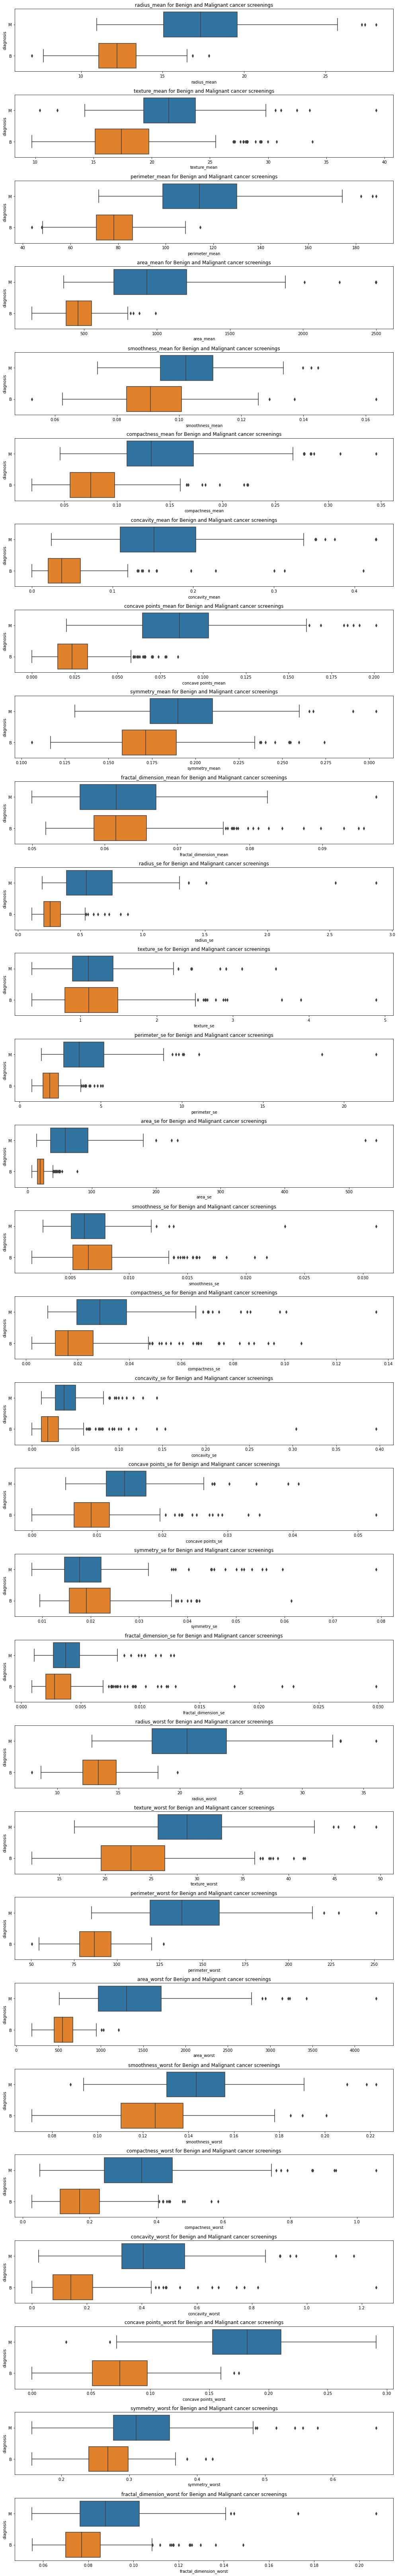

In [481]:
### Your code here
import seaborn as sns
fig, ax = plt.subplots(30,1, figsize=(14,90))
i = 0
for col in cancer_X.columns.values.tolist():
    sns.boxplot(x=cancer_df[col],y=cancer_y, ax=ax[i])
    ax[i].set_title("% s for Benign and Malignant cancer screenings"% col)
    i = i + 1
fig.tight_layout()
plt.show()


### 2.2 Data Pre-processing

**Apply the following pre-processing steps to the breast cancer dataset:**

1. Encode the categorical label as 0 (B) or 1 (M).
2. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model (certain broadcasting operations may fail unexpectedly).
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices cancer_X_train, cancer_X_val, and cancer_X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from cancer_X_train, and apply it to cancer_X_train, cancer_X_val, and cancer_X_test.
4. Add a column of ones to the feature matrices cancer_X_train, cancer_X_val, and cancer_X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


At the end of this pre-processing, you should have the following vectors and matrices: cancer_X_train, cancer_X_val, cancer_X_test, cancer_y_train, cancer_y_val, cancer_y_test.

### 2.3 Implement Logistic Regression

In [482]:
enc = OrdinalEncoder()
#cancer_y['diagnosis'] = enc.fit_transform(cancer_y['diagnosis'])
#cancer_y['diagnosis'] = cancer_y['diagnosis'].astype(int)
#cancer_y.head()

cancer_df['test'] = np.where(cancer_df['diagnosis'] == 'M', 1, 0)
cancer_y = cancer_df['test']
cancer_df.drop('test', axis=1)
cancer_y = cancer_y.to_numpy()
cancer_y = cancer_y.reshape((cancer_y.shape[0],1))
# 1. No categorical features in the synthetic dataset (skip this step)

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
cancer_X_dev, cancer_X_test, cancer_y_dev, cancer_y_test = train_test_split(cancer_X, cancer_y, test_size=0.2, random_state=0)
cancer_X_train, cancer_X_val, cancer_y_train, cancer_y_val = train_test_split(cancer_X_dev, cancer_y_dev, test_size=0.25, random_state=0)

# 3. Standardize the columns in the feature matrices
scaler = StandardScaler()
cancer_X_train = scaler.fit_transform(cancer_X_train)   # Fit and transform scalar on X_train
cancer_X_val = scaler.transform(cancer_X_val)           # Transform X_val
cancer_X_test = scaler.transform(cancer_X_test)         # Transform X_test

# 4. Add a column of ones to the feature matrices
cancer_X_train = np.hstack([np.ones((cancer_X_train.shape[0], 1)), cancer_X_train])
cancer_X_val = np.hstack([np.ones((cancer_X_val.shape[0], 1)), cancer_X_val])
cancer_X_test = np.hstack([np.ones((cancer_X_test.shape[0], 1)), cancer_X_test])








We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**Implement a `LogisticRegression` class with five methods: `train`, `predict`, `calculate_loss`, `calculate_gradient`, and `calculate_sigmoid`.** You may NOT use sklearn for this implementation. It is highly recommended that you vectorize your code.

In [483]:
import math

### 2.4 Train, Evaluate, and Interpret Logistic Regression Model

In [484]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        losses = []
        num_rows, num_cols = X.shape
        self.w = np.zeros((num_cols,1))
        for i in range(self.t):
            self.w = self.w  - self.eta * self.calculate_gradient(X, y)
            curr_loss = self.calculate_loss(X, y)
            losses.append(curr_loss)
        losses_array = np.array(losses)
        return losses_array
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        values = self.calculate_sigmoid(np.matmul(X, self.w))
        values[values >= .5] = 1
        values[values < 1] = 0
        return values
        
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        sigma_val = self.calculate_sigmoid(np.matmul(X,self.w))
        LHS = np.matmul(y.T, np.log(sigma_val))
        RHS = np.matmul((1 - y).T, np.log(1 - sigma_val))
        reg_term = self.alpha * np.linalg.norm(self.w,ord=2) * np.linalg.norm(self.w,ord=2)
        output = (-LHS - RHS + reg_term)[0]
        return output
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        inside = self.calculate_sigmoid(np.matmul(X, self.w)) - y
        gradient = np.matmul(X.T,inside) + 2*self.alpha*self.w
        return gradient
    
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
    
        sigmoid_x = []
        for curr_x in x:
            val = 1/(1 + pow(math.e, -curr_x[0])) #change if neccesary
            sigmoid_x.append([val],)
        sigmoid_x = np.array(sigmoid_x)
        return sigmoid_x

**Using your implementation above, train a logistic regression model (alpha=0, t=100, eta=1e-3) on the breast cancer training data. Plot the training loss over epochs. Make sure to label your axes.** You should see the loss decreasing and start to converge.

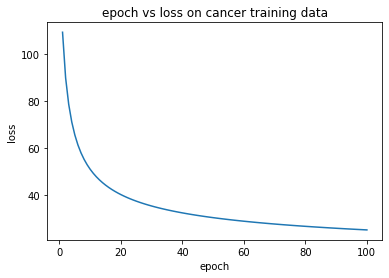

In [486]:
#convert to array before passing 
cancer_X_train
cancer_y_train
model = LogisticRegression()
losses = model.train(cancer_X_train,cancer_y_train)
plt.plot(list(range(1,101)), losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('epoch vs loss on cancer training data')
plt.show()

**Use your trained model to make predictions and report the accuracy on the training, validation, and test sets. Report the first 5 predictions on the test set, along with the actual labels.** Your accuracies should be much higher than the baseline accuracy we found in Section 2.1.

In [487]:
from sklearn.metrics import accuracy_score

y_pred_train = model.predict(cancer_X_train)
y_true_train = cancer_y_train
print('accuracy on train set: ')
print (accuracy_score(y_true_train, y_pred_train))
y_pred_val = model.predict(cancer_X_val)
y_true_val = cancer_y_val
print('accuracy on val set: ')
print (accuracy_score(y_true_val, y_pred_val))

y_pred_test = model.predict(cancer_X_test)
y_true_test = cancer_y_test
print('accuracy on test set: ')
print (accuracy_score(y_true_test, y_pred_test))

print('first five predictions:')
print(y_pred_test[:5])
print('actual: ')
print(y_true_test[:5])



accuracy on train set: 
0.9882697947214076
accuracy on val set: 
0.9649122807017544
accuracy on test set: 
0.956140350877193
first five predictions:
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]]
actual: 
[[1]
 [0]
 [0]
 [0]
 [0]]


**Interpret your trained model using a bar chart of the model weights.** Make sure to label the bars (x-axis) and don't forget the bias term! Use lecture 3, slide 15 as a reference.

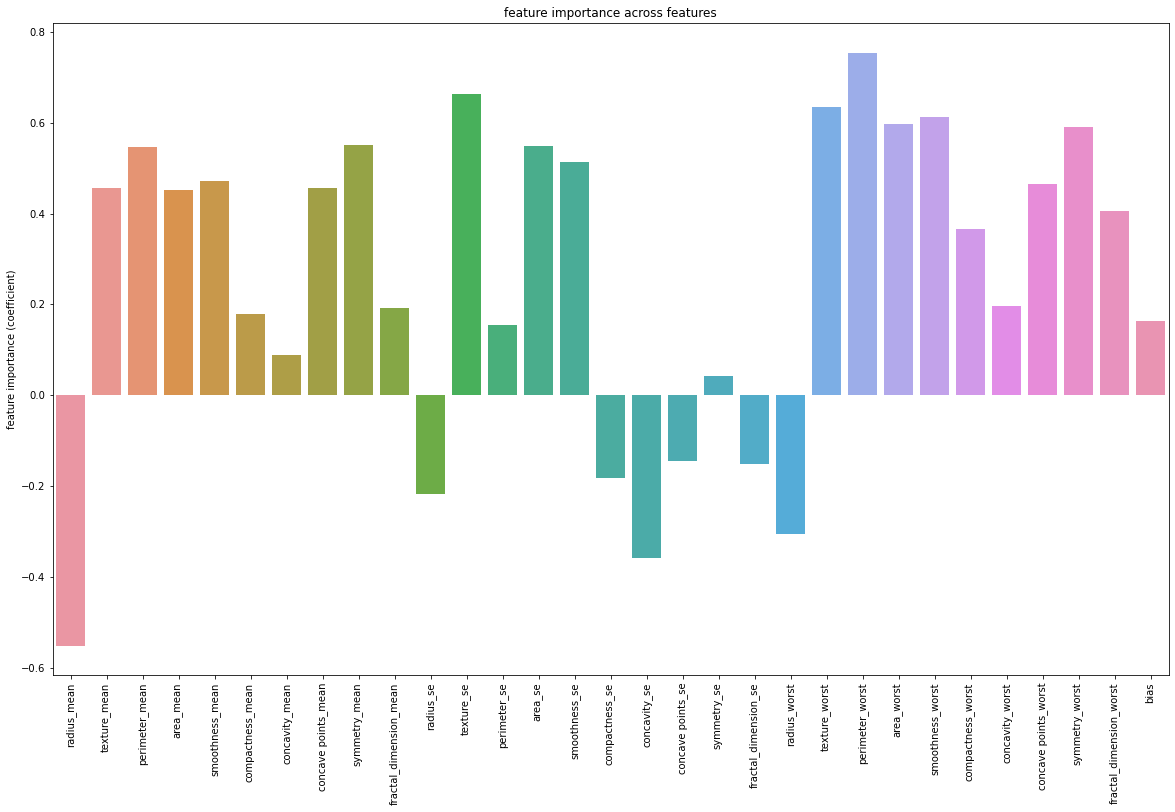

In [488]:
fig = plt.figure(figsize = (20,12))
xval = np.zeros((31))
yval = np.reshape(model.w, -1)
xval.shape
ax = sns.barplot(x=feature_names, y=yval)
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel('feature importance (coefficient)')
ax.set_title('feature importance across features')
plt.show()

**According to your model, which features are the greatest contributors to the diagnosis?**

In [489]:
### Your answer here

''' Perimeter_worst, Texture_worst, texture_se, smoothness_worst (largest values of w, negative or positive)

'''

' Perimeter_worst, Texture_worst, texture_se, smoothness_worst (largest values of w, negative or positive)\n\n'

### 2.5 Tune Regularization Parameter  𝛼

Now, we will observe the effect of tuning the regularization parameter $\alpha$ on the learned weights of the model.

**Sweep out values for $\alpha$ using `alphas = np.logspace(-2, 2, 100)`. For each $\alpha$ value, train a logistic regression model and record its weights. Plot the weights for each feature as a function of $\alpha$ on a single figure. Make sure to label the axes.** You should have 31 curves (one for each feature) in the plot.

In [490]:
### Your code here
alphas =  np.logspace(-2, 2, 100)
weights = pd.DataFrame(columns=feature_names)
weight_curr = []
for alpha in alphas:
    model = LogisticRegression(alpha=alpha)
    model.train(cancer_X_train,cancer_y_train)
    weight_curr = pd.DataFrame(model.w.T, columns=feature_names)
    weights = weights.append(weight_curr)

    

[]

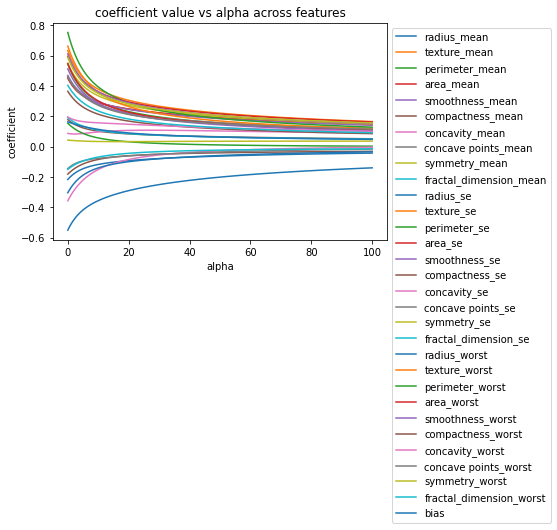

In [491]:
#weights.T.plot()
weights['alpha'] = alphas
ax = weights.set_index('alpha').plot()
ax.legend(bbox_to_anchor=(1.0,1.0))
ax.set_ylabel('coefficient')
ax.set_title('coefficient value vs alpha across features')
ax.plot()

**Describe the effect of the regularization parameter $\alpha$ on the weights of your model. Please explain in terms of model complexity.**

In [492]:
### Your answer here

'''
Higher values of alpha leads to smaller values of coefficients for different features - with some features at zero
coefficient or very small, we are reducing our model complexity (fewer features matter). 
'''

'\nHigher values of alpha leads to smaller values of coefficients for different features - with some features at zero\ncoefficient or very small, we are reducing our model complexity (fewer features matter). \n'

## Part 3: SVM

You are allowed to use sklearn or any ML library in this part.

### 3.1 Train Primal SVM

**Train a primal SVM (with default parameters) on the breast cancer training data. Make predictions and report the accuracy on the training, validation, and test sets.**

In [493]:
### Your code here
from sklearn.svm import LinearSVC

primalModel = LinearSVC(dual=False)
primalModel.fit(cancer_X_train,cancer_y_train)

y_pred_train = primalModel.predict(cancer_X_train)
y_true_train = cancer_y_train
print('accuracy on train set: ')
print (accuracy_score(y_true_train, y_pred_train))
y_pred_val = primalModel.predict(cancer_X_val)
y_true_val = cancer_y_val
print('accuracy on val set: ')
print (accuracy_score(y_true_val, y_pred_val))

y_pred_test = primalModel.predict(cancer_X_test)
y_true_test = cancer_y_test
print('accuracy on test set: ')
print (accuracy_score(y_true_test, y_pred_test))

print('first five predictions:')
print(y_pred_test[:5])
print('actual: ')
print(y_true_test[:5])




accuracy on train set: 
0.9912023460410557
accuracy on val set: 
0.9298245614035088
accuracy on test set: 
0.9473684210526315
first five predictions:
[1 0 0 0 0]
actual: 
[[1]
 [0]
 [0]
 [0]
 [0]]


/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### 3.2 Train Dual SVM

**Train a dual SVM (with default parameters) on the breast cancer training data. Make predictions and report the accuracy on the training, validation, and test sets.**

In [494]:
### Your code here
from sklearn import svm
dualModelSVM = svm.SVC(kernel='linear')
dualModelSVM.fit(cancer_X_train,cancer_y_train)

y_pred_train = dualModelSVM.predict(cancer_X_train)
y_true_train = cancer_y_train
print('accuracy on train set: ')
print (accuracy_score(y_true_train, y_pred_train))
y_pred_val = dualModelSVM.predict(cancer_X_val)
y_true_val = cancer_y_val
print('accuracy on val set: ')
print (accuracy_score(y_true_val, y_pred_val))

y_pred_test = dualModelSVM.predict(cancer_X_test)
y_true_test = cancer_y_test
print('accuracy on test set: ')
print (accuracy_score(y_true_test, y_pred_test))

print('first five predictions:')
print(y_pred_test[:5])
print('actual: ')
print(y_true_test[:5])


accuracy on train set: 
0.9912023460410557
accuracy on val set: 
0.9473684210526315
accuracy on test set: 
0.9649122807017544
first five predictions:
[1 0 0 0 0]
actual: 
[[1]
 [0]
 [0]
 [0]
 [0]]


/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### 3.3 Number of Support Vectors

**Find the number of support vectors in your SVM model.**

In [495]:
### Your code here
print(dualModelSVM.n_support_)
#17 vectors for malignant and 12 vectors for benign

[17 12]


### 3.4 Hyperparameter Tuning

**Improve the SVM model (by hyperparameter tuning, feature selection, or using a non-linear SVM) to get better test performance than the dual SVM.**

In [496]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(GridSearchCV(LinearSVC(),
                                 param_grid = {"C":np.logspace(-3,3,20),
                                              "loss":["hinge", "squared_hinge"],
                                              "penalty":["l1","l2"]},
                                 return_train_score=True))
pipe.fit(cancer_X_train,cancer_y_train)
grid_search_results = pipe.named_steps["gridsearchcv"]
print(f"Best score:", grid_search_results.best_score_)
print(f"Best params:", grid_search_results.best_params_)
print(f"Test score:", pipe.score(cancer_X_test,cancer_y_test))




/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 234, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 974, in _fit

/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 234, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 974, in _fit

/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 234, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 974, in _fit

/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 234, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 974, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 830, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments: %s,

/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exampl

/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 234, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 974, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 830, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments: %s,

Best score: 0.9823955669224211
Best params: {'C': 0.07847599703514611, 'loss': 'hinge', 'penalty': 'l2'}
Test score: 0.9736842105263158


/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/Griffin/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/U

In [497]:
'''
Best score: 0.9823955669224211
Best params: {'C': 0.07847599703514611, 'loss': 'hinge', 'penalty': 'l2'}
Test score: 0.9736842105263158
beats dual!
'''


"\nBest score: 0.9823955669224211\nBest params: {'C': 0.07847599703514611, 'loss': 'hinge', 'penalty': 'l2'}\nTest score: 0.9736842105263158\nbeats dual!\n"

In [498]:
""

''